In [1]:
import datetime
import os
import pandas as pd
from statsmodels.tsa import stattools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame.from_csv("./training.csv", header=0, sep=',', index_col=False, parse_dates=False, encoding=None)
print(data.head())
print(len(data))

   feat_asys  feat_ccgi  feat_ge  feat_pcrfy  label_tsla
0       7.08       1.39    19.32        7.29       32.47
1       7.33       1.21    19.25        7.15       30.19
2       6.96       1.37    18.91        7.29       30.06
3       6.80       1.37    19.09        7.21       32.96
4       5.40       1.47    19.01        7.05       32.25
1258


In [3]:
# Split into Train and Test set

train = data.iloc[0:1006, 0:4]
test = data.iloc[1007:, 0:4]
train_y = data.iloc[0:1006, 4:5]
test_y = data.iloc[1007:, 4:5]

In [23]:
# Model 1 - SVM Kernel Nonlinear

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e2)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf = svr_rbf.fit(train, train_y.values.ravel()).predict(test)
y_lin = svr_lin.fit(train, train_y.values.ravel()).predict(test)
y_poly = svr_poly.fit(train, train_y.values.ravel()).predict(test)

In [24]:
# Calculating Accuracy

acc_rbf = svr_rbf.score(test, test_y)
acc_lin = svr_lin.score(test, test_y)
acc_poly = svr_poly.score(test, test_y)
print("SVM with RBF Kernel has accuracy " + str(acc_rbf))
print("SVM with Linear Kernel has accuracy " + str(acc_lin))
print("SVM with Polynomial Kernel has accuracy " + str(acc_poly))

SVM with RBF Kernel has accuracy -0.0332182543932
SVM with Linear Kernel has accuracy 0.220784249078
SVM with Polynomial Kernel has accuracy 0.646387085354


//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


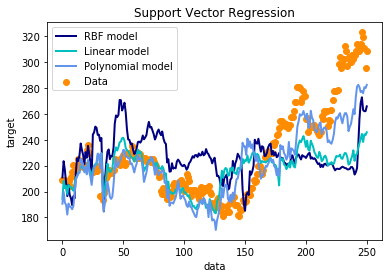

In [55]:
# Model Evaluation and Accuracy

lw = 2
X = np.arange(len(test_y))
plt.scatter(X, test_y, color='darkorange', label='Data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [47]:
# Model 2 - Ridge Regression

from sklearn.kernel_ridge import KernelRidge
rr_k = KernelRidge(alpha=0.1,degree=1, gamma=1e3, kernel='linear')
y_krr = rr_k.fit(train, train_y.values.ravel()).predict(test)
acc_krr = rr_k.score(test, test_y)
print("Kernel Ridge with RBF Kernel has accuracy " + str(acc_krr))

from sklearn import linear_model
rr = linear_model.RidgeCV(alphas=[0.0001, 0.1, 1.0, 10.0, 100.0], cv=None, fit_intercept=True, scoring=None,normalize=False)
y_rr = rr.fit(train, train_y.values.ravel()).predict(test)   
acc_rr = rr.score(test, test_y)
print("Ridge Regression has accuracy " + str(acc_rr))

Kernel Ridge with RBF Kernel has accuracy 0.220301871228
Ridge Regression has accuracy 0.346218661839


In [54]:
# Model 3 - LASSO Regression

from sklearn import linear_model
rr_l = linear_model.Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000, normalize=False, positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, warm_start=False)
y_lrr = rr_l.fit(train, train_y.values.ravel()).predict(test)
acc_lrr = rr_l.score(test, test_y)
print("LASSO Regression has accuracy " + str(acc_lrr))

LASSO Regression has accuracy 0.346296448359


//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


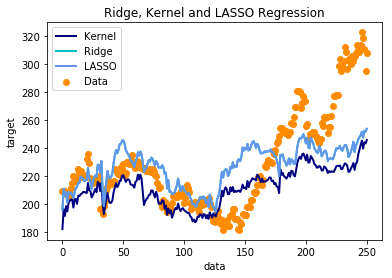

In [56]:
# Model Evaluation and Accuracy

lw = 2
X = np.arange(len(test_y))
plt.scatter(X, test_y, color='darkorange', label='Data')
plt.hold('on')
plt.plot(X, y_krr, color='navy', lw=lw, label='Kernel')
plt.plot(X, y_rr, color='c', lw=lw, label='Ridge')
plt.plot(X, y_lrr, color='cornflowerblue', lw=lw, label='LASSO')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Ridge, Kernel and LASSO Regression')
plt.legend()
plt.show()

//anaconda/envs/Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/envs/Python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


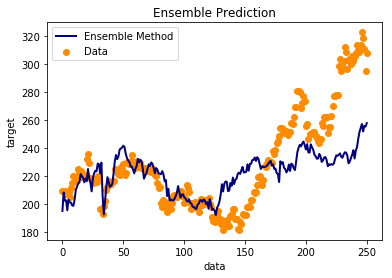

In [62]:
y_pred = (np.array(y_rbf) + np.array(y_lin) + np.array(y_poly) + np.array(y_krr) + np.array(y_rr) + np.array(y_lrr))/6
X = np.arange(len(test_y))
plt.scatter(X, test_y, color='darkorange', label='Data')
plt.hold('on')
plt.plot(X, y_pred, color='navy', lw=lw, label='Ensemble Method')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Ensemble Prediction')
plt.legend()
plt.show()

In [67]:
from sklearn.metrics import mean_absolute_error
print("Accuracy of Ensemble Methods " + str(mean_absolute_error(test_y, y_pred)))

Accuracy of Ensemble Methods 18.9493217306


In [68]:
from sklearn.metrics import explained_variance_score
print("Accuracy of Ensemble Methods " + str(explained_variance_score(test_y, y_pred)))

Accuracy of Ensemble Methods 0.428288410381


In [69]:
from sklearn.metrics import mean_squared_error
print("Accuracy of Ensemble Methods " + str(mean_squared_error(test_y, y_pred)))

Accuracy of Ensemble Methods 723.523213862
